In [173]:
import torch 
from math import sqrt
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wasserstein_distance as wd
rand = lambda : torch.randn(SAMPLES)

In [174]:
ITERS = int(1e4) 
SAMPLES = int(1e3)
alpha = 0.3

In [175]:
p = Normal(torch.tensor(4.0), torch.tensor(2.0))

def eps(t): # epsilon(t)
    return 1/(t**alpha)

def stochastic_langevin_update(x, p, t):
    assert t >= 0
    t += 1 #! for t = 0
    p.log_prob(x).sum().backward()        
    eps_ = eps(t)

    Z =  x + (x.grad *  eps_ ) + 2 * sqrt(eps_) * rand()
    # print(Z.requires_grad)
    return Z.detach().requires_grad_()



In [176]:
x = torch.randn(SAMPLES, requires_grad=True)


for i in range(ITERS):
    x = stochastic_langevin_update(x, p, i)


wasserstein_distance: 0.5684897536306084


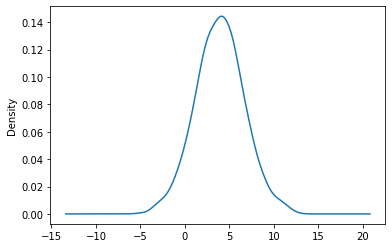

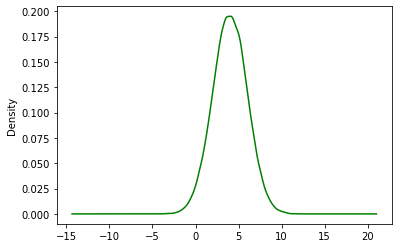

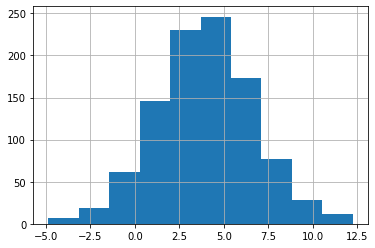

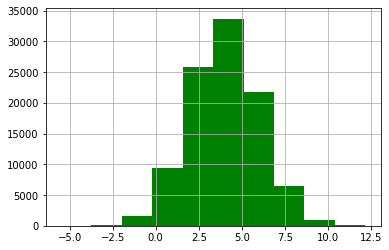

In [178]:
viz = pd.Series(x.detach().numpy())
gt = pd.Series(p.sample((SAMPLES * 100,)))
print('wasserstein_distance:', wd(viz, gt))
viz.plot.kde()
plt.show()
gt.plot.kde(color='g')
plt.show()


viz.hist()
plt.show()
gt.hist(color='g')
plt.show()
